In [1]:
import pandas as pd
import numpy as np
import pickle
pd.set_option('display.max_columns', 350)
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.metrics import confusion_matrix
 
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import  RobustScaler
 
import imblearn
import xgboost as xgb 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier 
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler  
  
from sklearn.compose import ColumnTransformer  
from imxgboost.imbalance_xgb import imbalance_xgboost as imb_xgb 
import functools 
from sklearn.model_selection import LeaveOneOut, cross_validate, KFold, GridSearchCV, RandomizedSearchCV,cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
  
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, classification_report, roc_auc_score, make_scorer, precision_score, recall_score, roc_auc_score
from sklearn.metrics import fbeta_score, make_scorer, recall_score, log_loss, confusion_matrix, precision_recall_curve, auc,accuracy_score, precision_score,  roc_curve
from sklearn.metrics import average_precision_score,precision_recall_curve, auc,  accuracy_score    
from sklearn.model_selection import train_test_split       
from sklearn.metrics import make_scorer 
from tabulate import tabulate
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA

from scipy.stats import skew, kurtosis
from prettytable import PrettyTable
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report
from imblearn.pipeline import Pipeline as ImbalancedPipeline
from sklearn.utils import shuffle
from scipy.sparse import csr_matrix, csc_matrix
import dask.dataframe as dd

In [2]:
path = r'C:\Users\Katerina\Desktop\creditcard.csv'
df = pd.read_csv(path)
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20 

In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
def calculate_duplicate_percentage(df):
    total_rows = len(df)
    duplicate_rows = len(df[df.duplicated()])
    duplicate_percentage = (duplicate_rows / total_rows) * 100
    return duplicate_percentage
 

duplicate_percentage = calculate_duplicate_percentage(df)
print(f"Duplicate percentage: {duplicate_percentage:.2f}%")

Duplicate percentage: 0.38%


In [6]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
target_percentages = (df['Class'].value_counts() / len(df)) * 100
target_percentages

Class
0    99.827251
1     0.172749
Name: count, dtype: float64

In [8]:
categ = df.select_dtypes(include=['object']).columns
for col in categ:
    df[col].fillna('NV', inplace=True)


In [9]:
numer = df.select_dtypes(include=[np.number])
numer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
numer = numer.round(2)
df.update(numer)
numer.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,2.848070e+05,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.000008,-0.000002,-0.000005,-0.000002,0.000001,-0.000001,0.000002,-0.000008,0.000003,-0.000003,-0.000007,-0.000009,0.000008,0.000004,0.000002,-0.000006,0.000010,-0.000006,-0.000009,0.000008,0.000003,0.000005,-0.000003,0.000004,-0.000002,0.000002,-8.075644e-07,-0.000002,88.349619,0.001727
std,47488.145955,1.958696,1.651319,1.516255,1.415872,1.380260,1.332266,1.237097,1.194356,1.098622,1.088851,1.020718,0.999205,0.995279,0.958606,0.915322,0.876260,0.849336,0.838179,0.814036,0.770932,0.734524,0.725713,0.624475,0.605654,0.521295,0.482235,4.036492e-01,0.330105,250.120109,0.041527
min,0.000000,-56.410000,-72.720000,-48.330000,-5.680000,-113.740000,-26.160000,-43.560000,-73.220000,-13.430000,-24.590000,-4.800000,-18.680000,-5.790000,-19.210000,-4.500000,-14.130000,-25.160000,-9.500000,-7.210000,-54.500000,-34.830000,-10.930000,-44.810000,-2.840000,-10.300000,-2.600000,-2.257000e+01,-15.430000,0.000000,0.000000
25%,54201.500000,-0.920000,-0.600000,-0.890000,-0.850000,-0.690000,-0.770000,-0.550000,-0.210000,-0.640000,-0.540000,-0.760000,-0.410000,-0.650000,-0.430000,-0.580000,-0.470000,-0.480000,-0.500000,-0.460000,-0.210000,-0.230000,-0.540000,-0.160000,-0.350000,-0.320000,-0.330000,-7.000000e-02,-0.050000,5.600000,0.000000
50%,84692.000000,0.020000,0.070000,0.180000,-0.020000,-0.050000,-0.270000,0.040000,0.020000,-0.050000,-0.090000,-0.030000,0.140000,-0.010000,0.050000,0.050000,0.070000,-0.070000,0.000000,0.000000,-0.060000,-0.030000,0.010000,-0.010000,0.040000,0.020000,-0.050000,0.000000e+00,0.010000,22.000000,0.000000
75%,139320.500000,1.320000,0.800000,1.030000,0.740000,0.610000,0.400000,0.570000,0.330000,0.600000,0.450000,0.740000,0.620000,0.660000,0.490000,0.650000,0.520000,0.400000,0.500000,0.460000,0.130000,0.190000,0.530000,0.150000,0.440000,0.350000,0.240000,9.000000e-02,0.080000,77.165000,0.000000
max,172792.000000,2.450000,22.060000,9.380000,16.880000,34.800000,73.300000,120.590000,20.010000,15.590000,23.750000,12.020000,7.850000,7.130000,10.530000,8.880000,17.320000,9.250000,5.040000,5.590000,39.420000,27.200000,10.500000,22.530000,4.580000,7.520000,3.520000,3.161000e+01,33.850000,25691.160000,1.000000


Time
Skew : -0.04


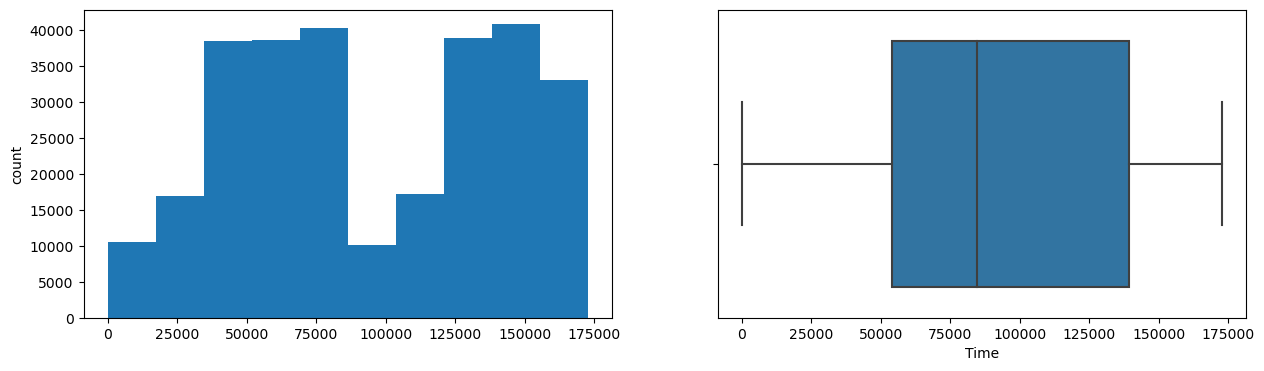

V1
Skew : -3.28


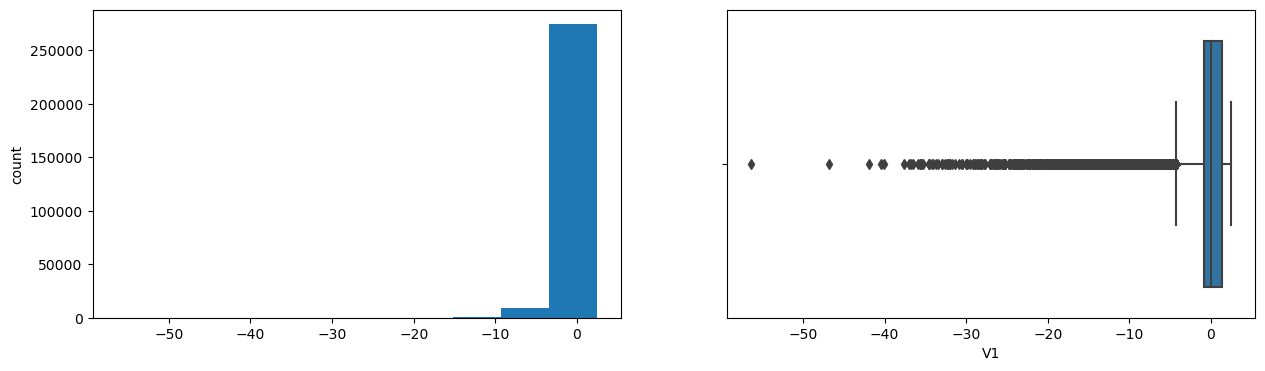

V2
Skew : -4.62


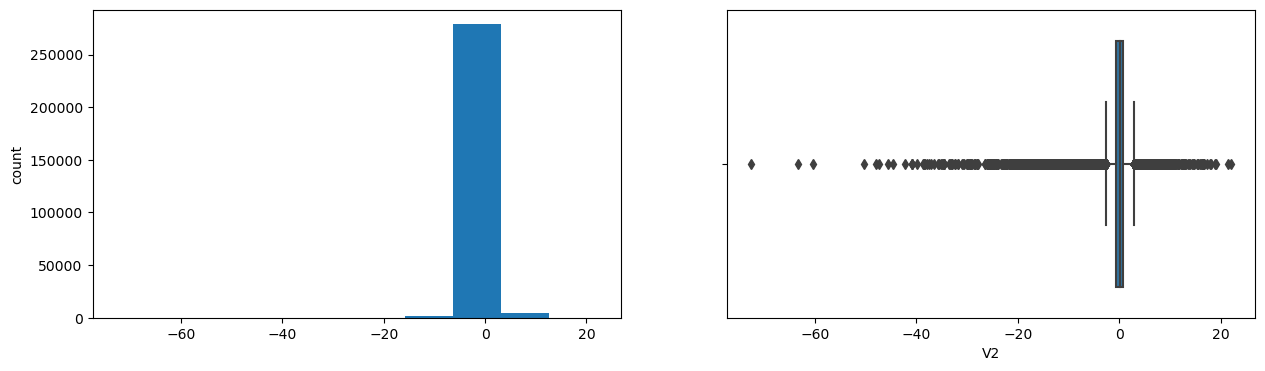

V3
Skew : -2.24


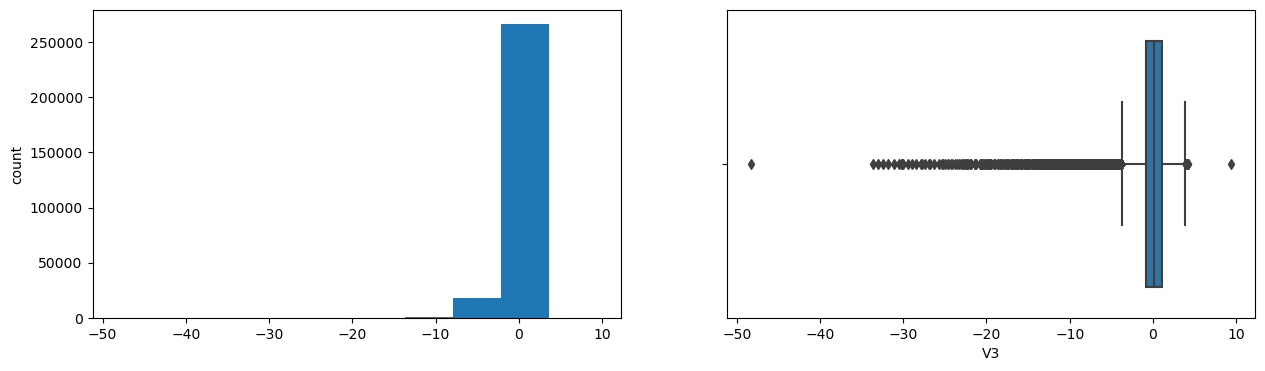

V4
Skew : 0.68


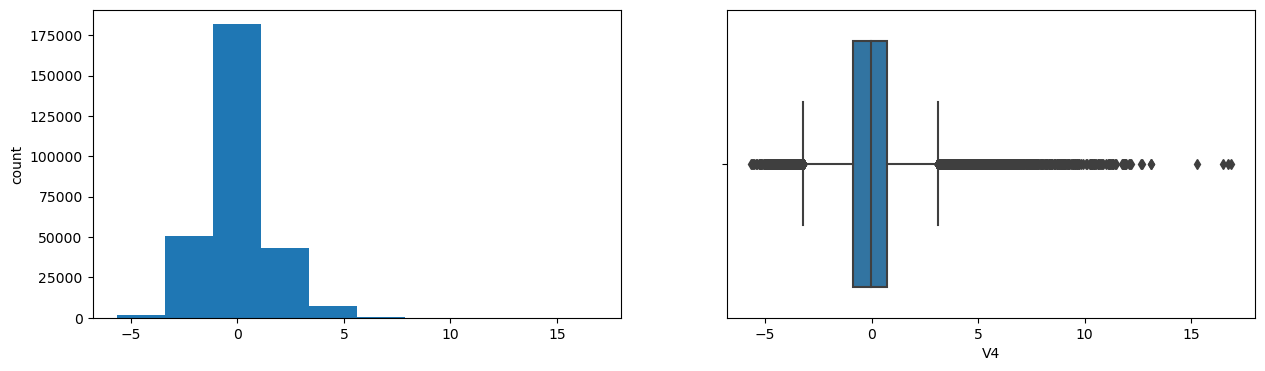

V5
Skew : -2.43


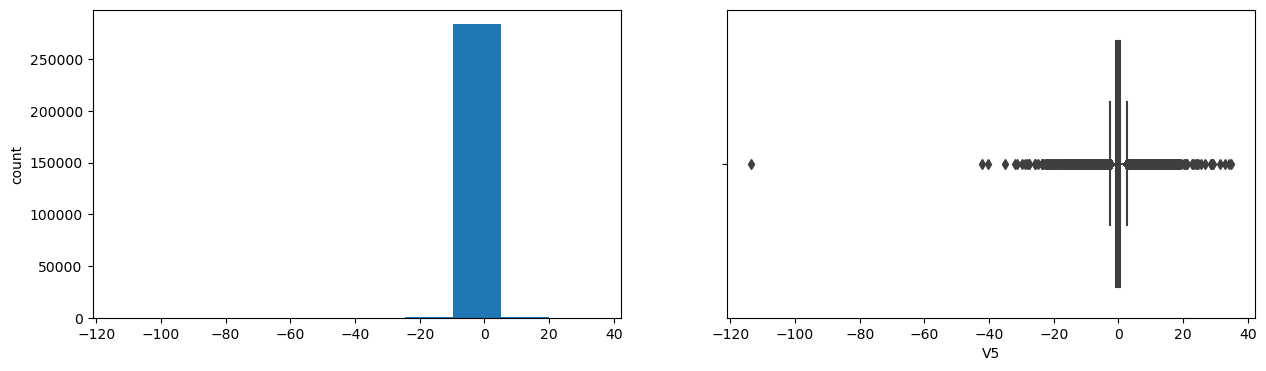

V6
Skew : 1.83


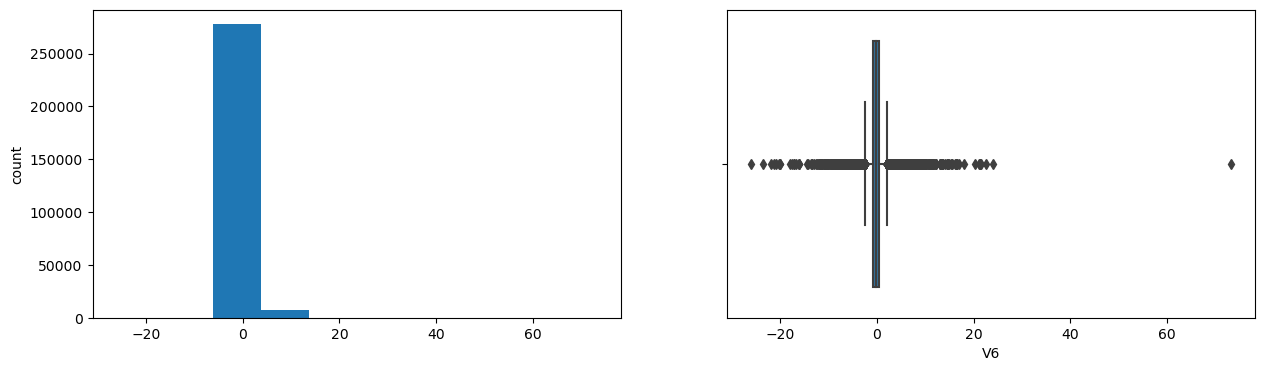

V7
Skew : 2.55


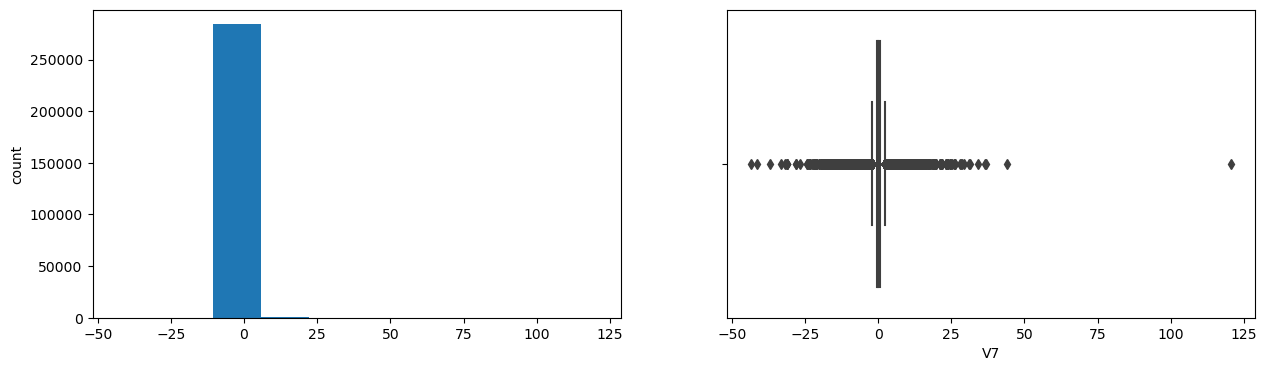

V8
Skew : -8.52


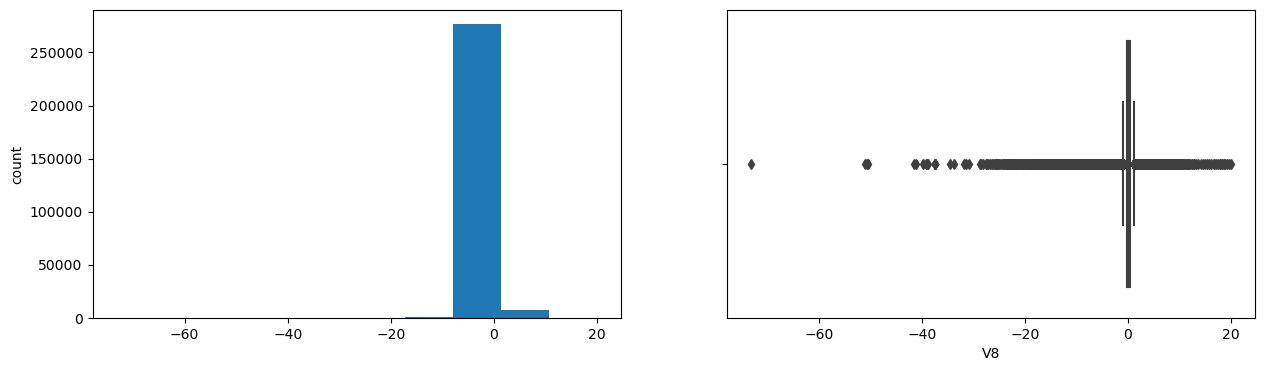

V9
Skew : 0.55


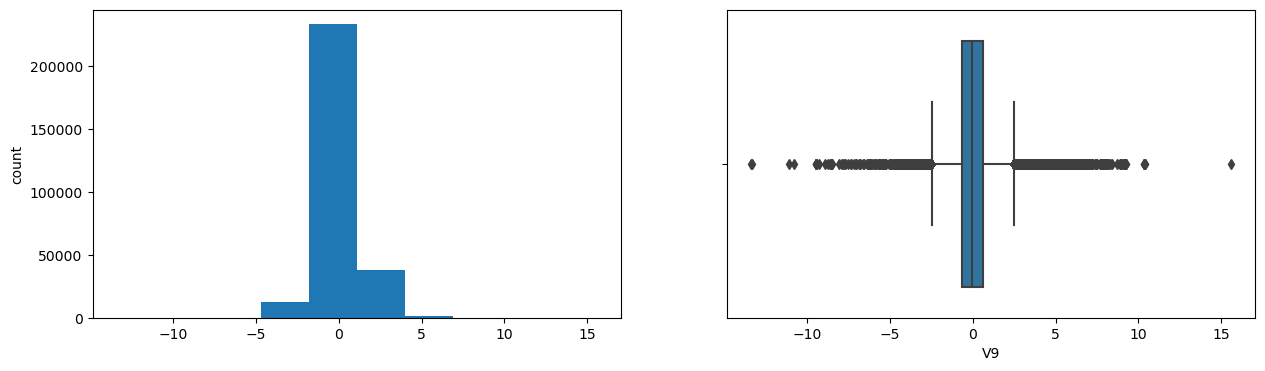

V10
Skew : 1.19


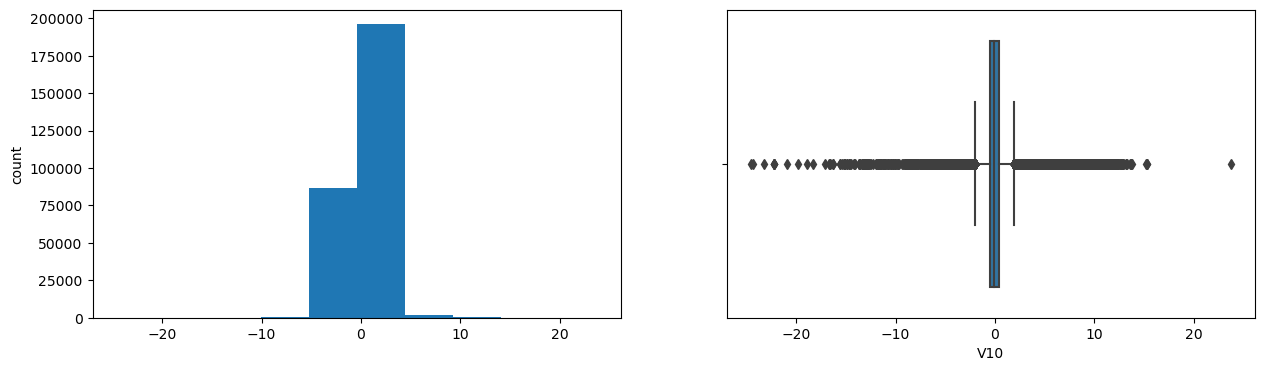

V11
Skew : 0.36


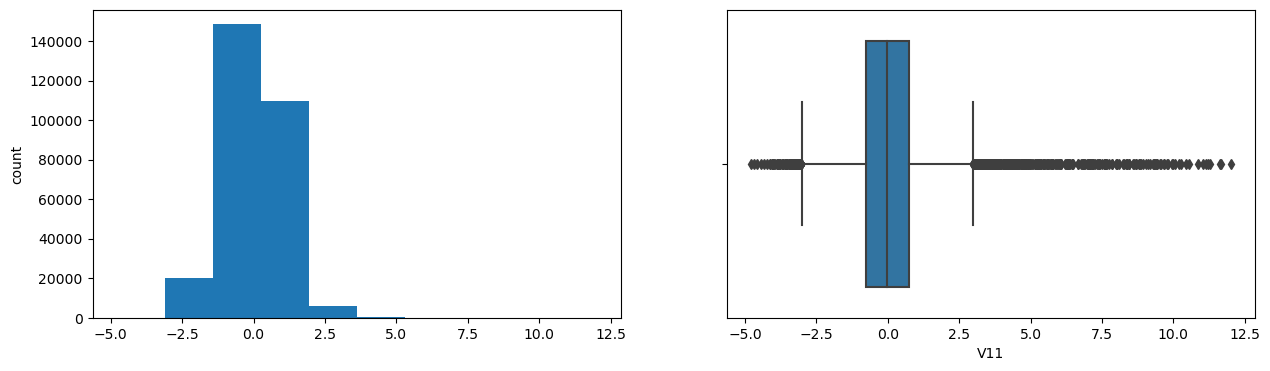

V12
Skew : -2.28


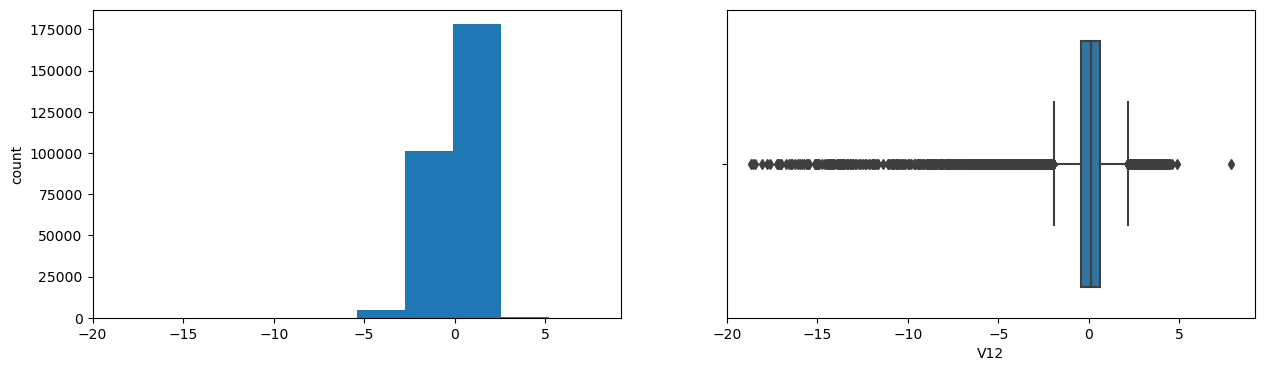

V13
Skew : 0.07


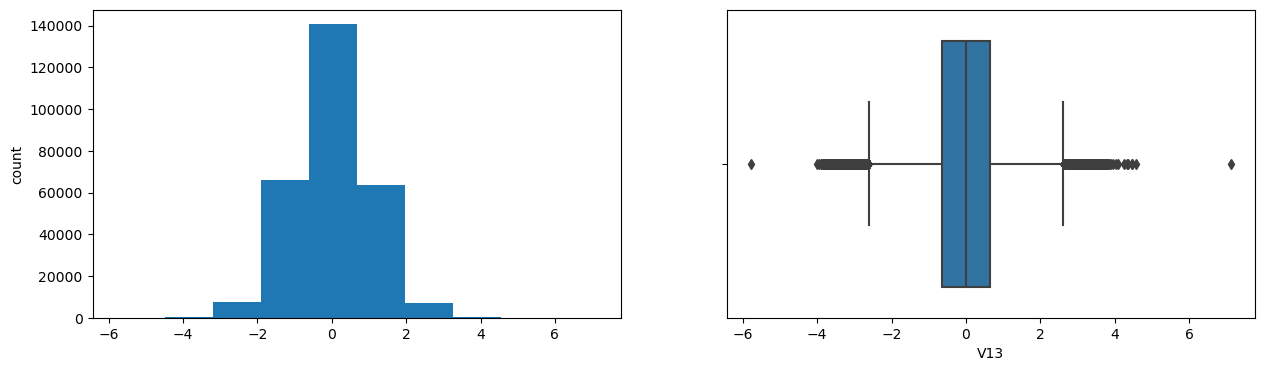

V14
Skew : -2.0


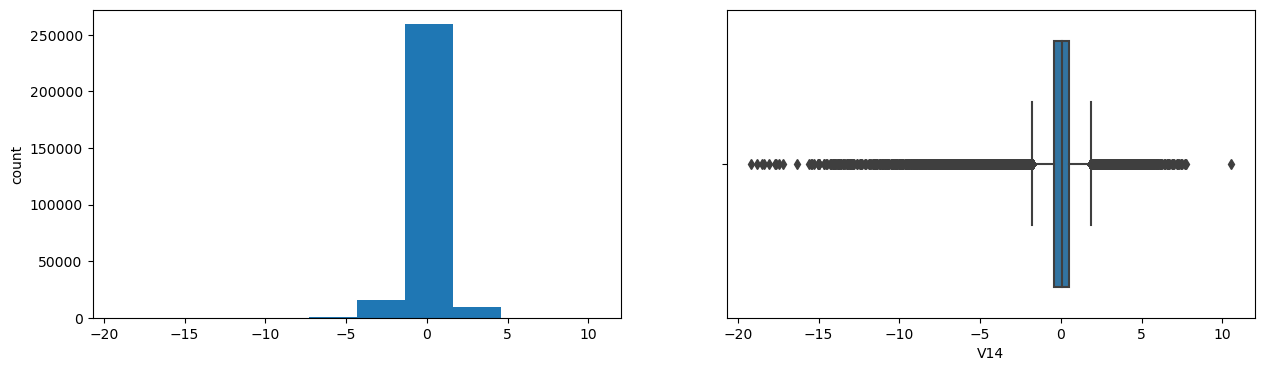

V15
Skew : -0.31


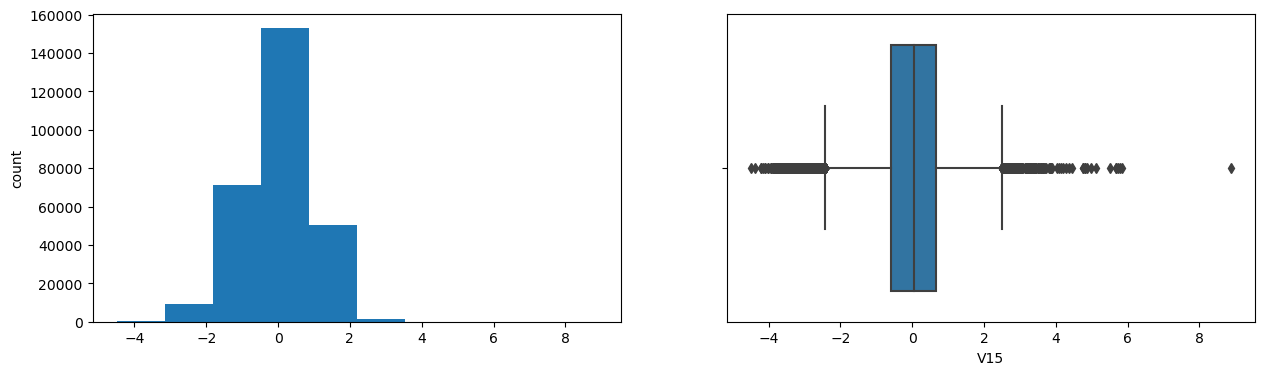

V16
Skew : -1.1


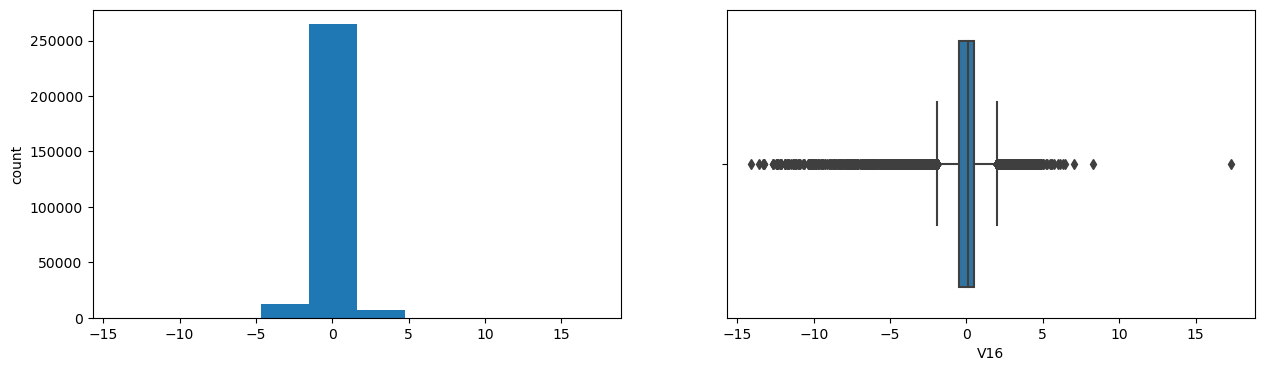

V17
Skew : -3.85


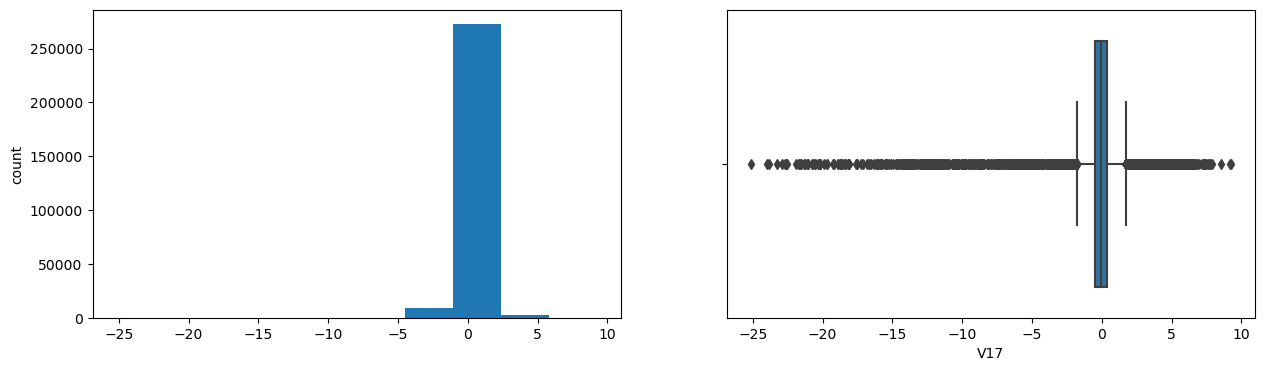

V18
Skew : -0.26


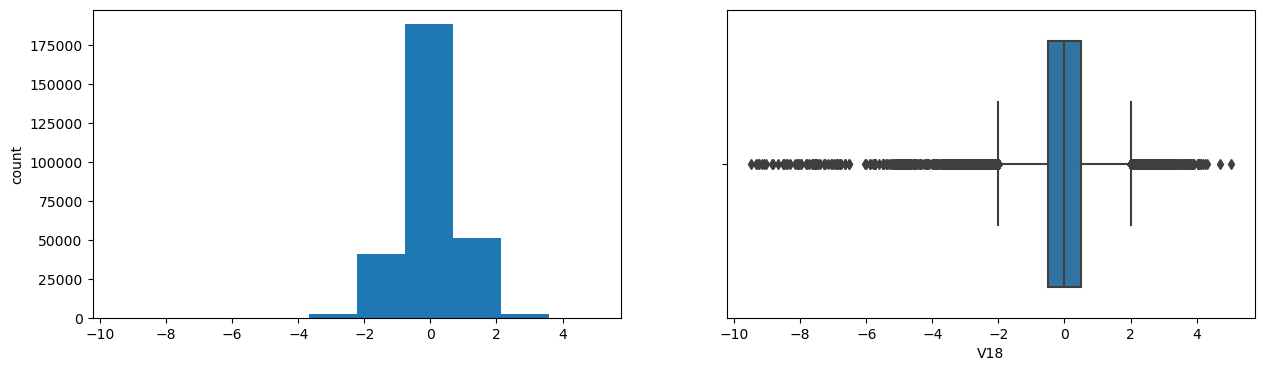

V19
Skew : 0.11


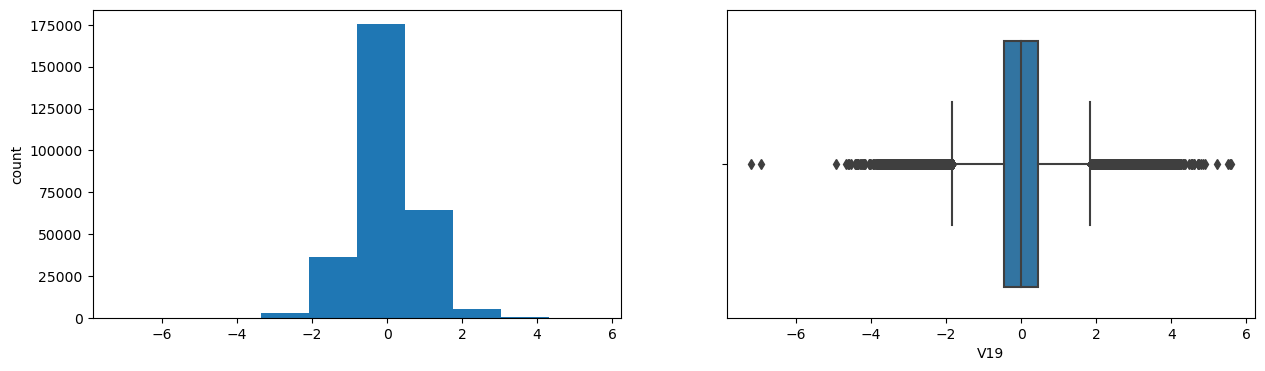

V20
Skew : -2.04


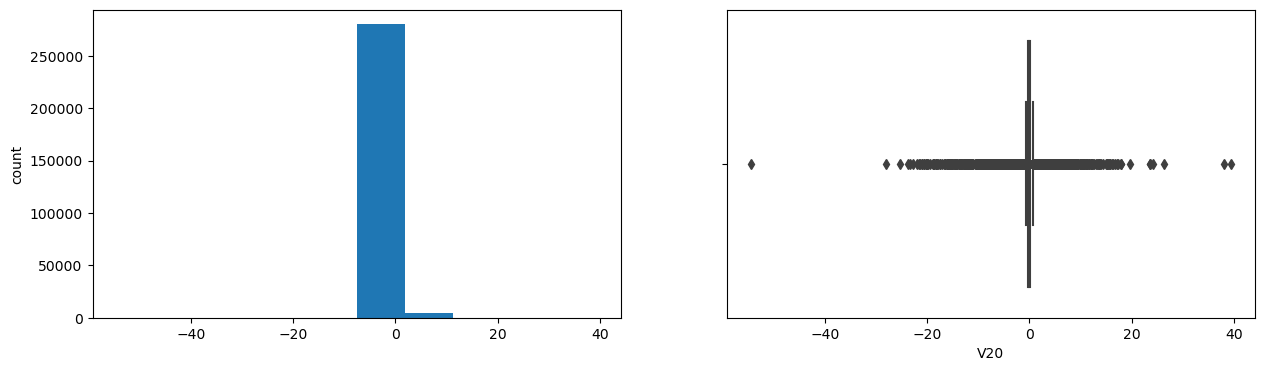

V21
Skew : 3.59


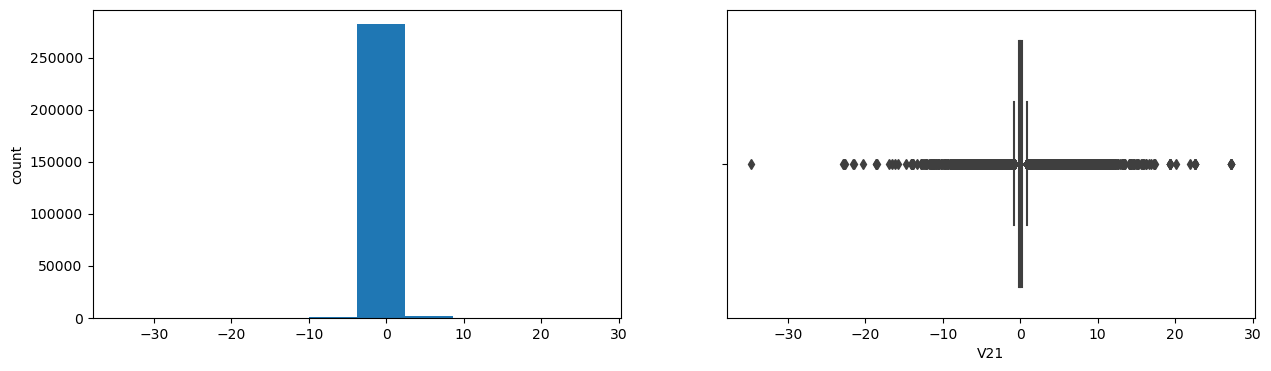

V22
Skew : -0.21


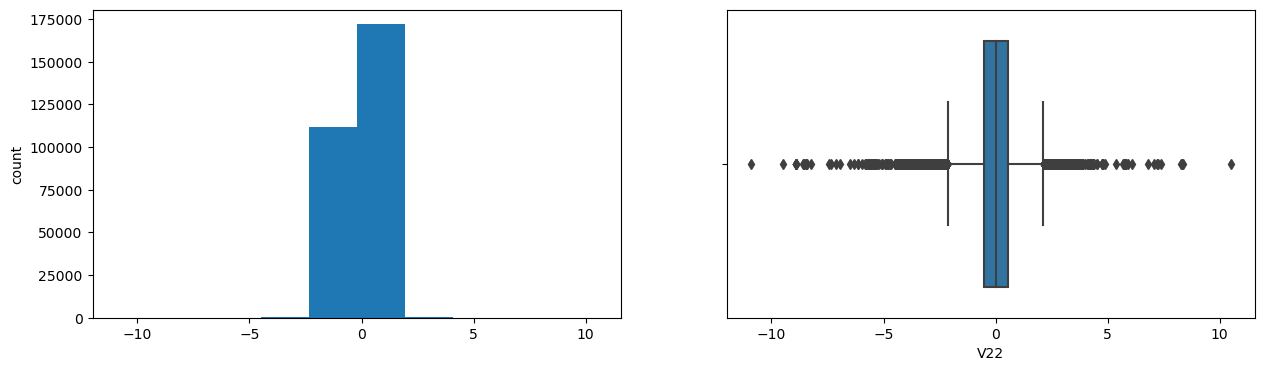

V23
Skew : -5.88


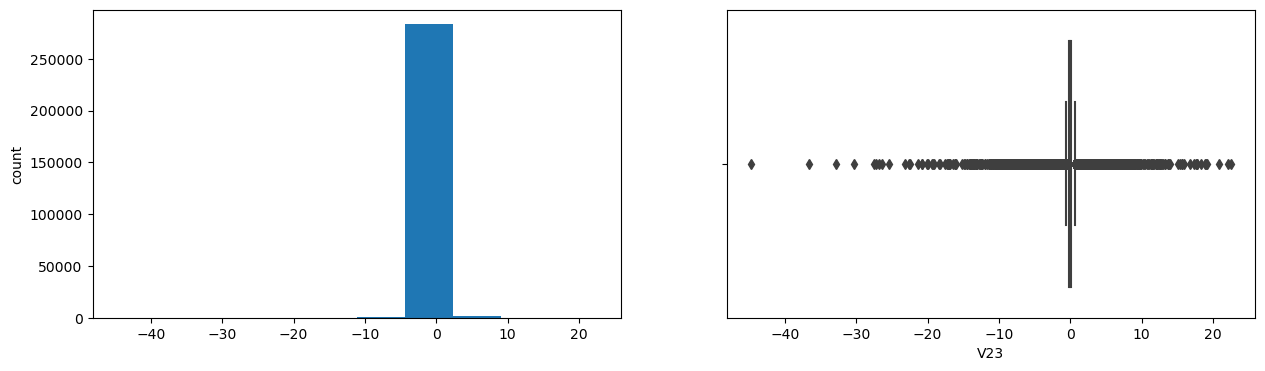

V24
Skew : -0.55


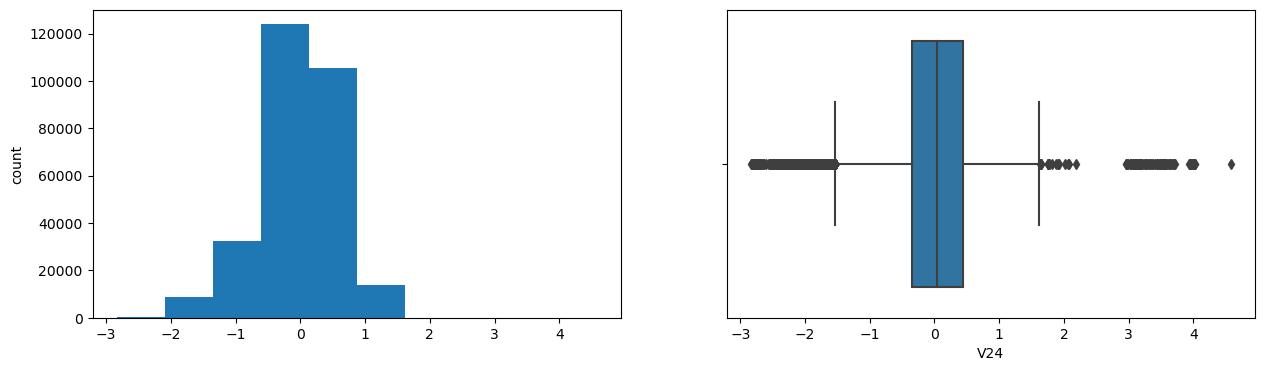

V25
Skew : -0.42


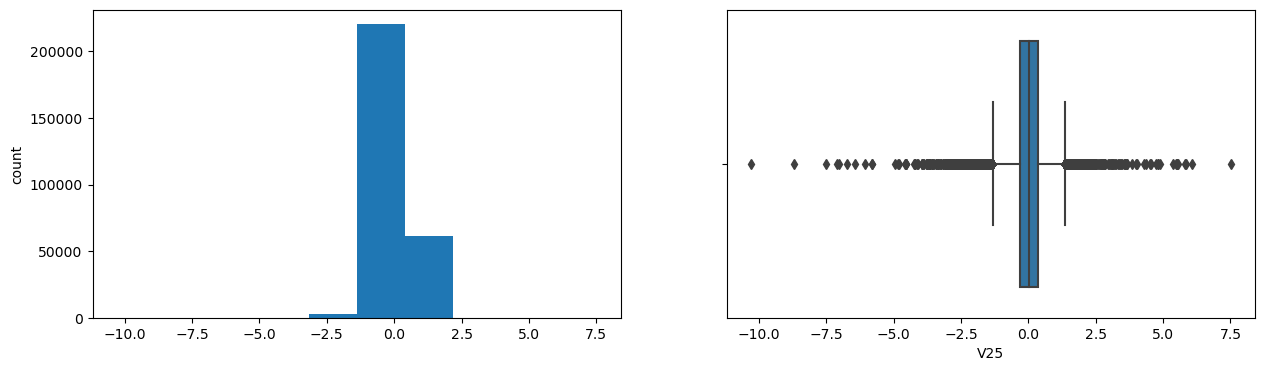

V26
Skew : 0.58


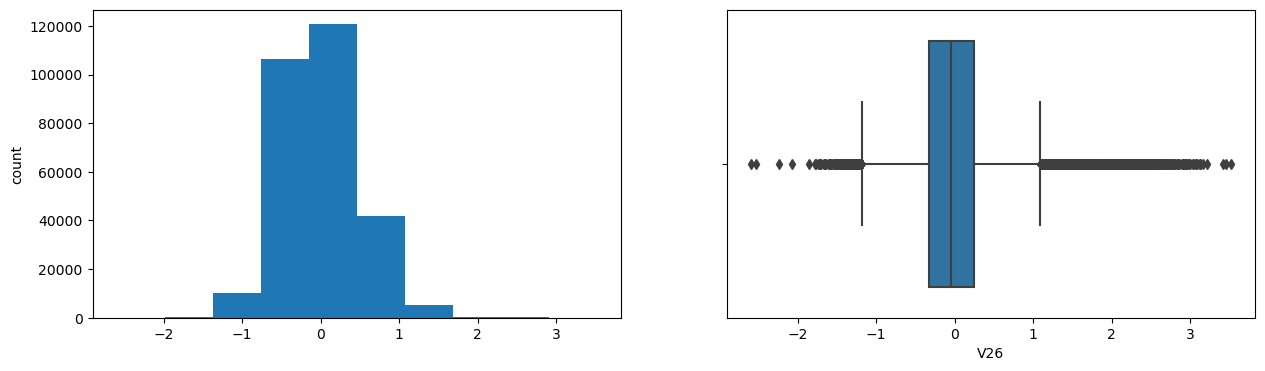

V27
Skew : -1.17


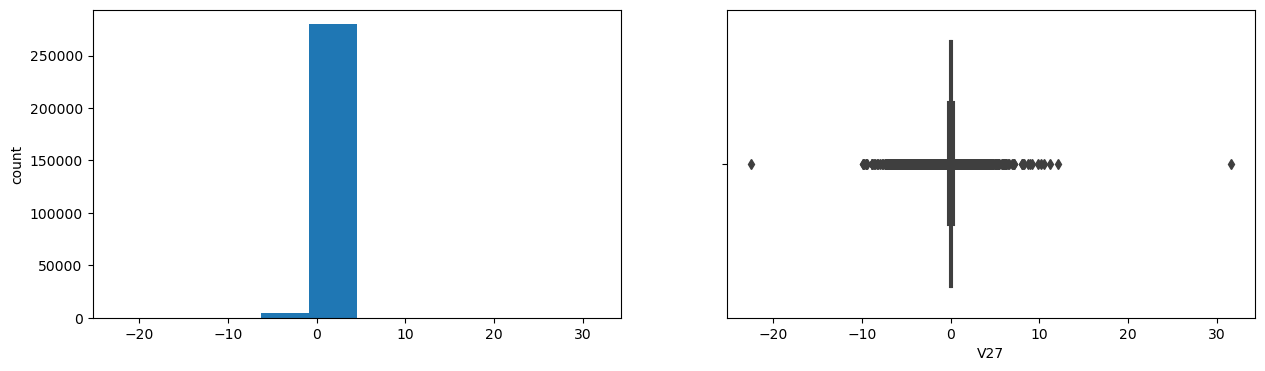

V28
Skew : 11.19


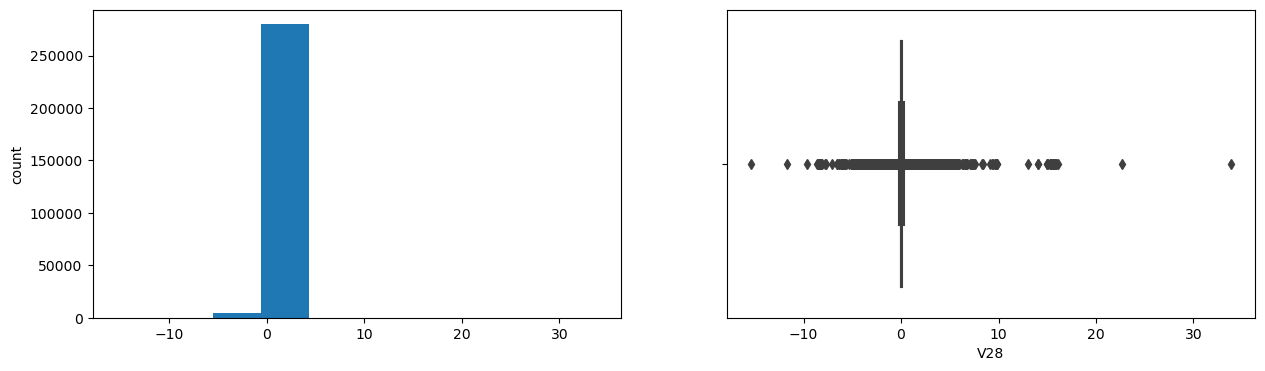

Amount
Skew : 16.98


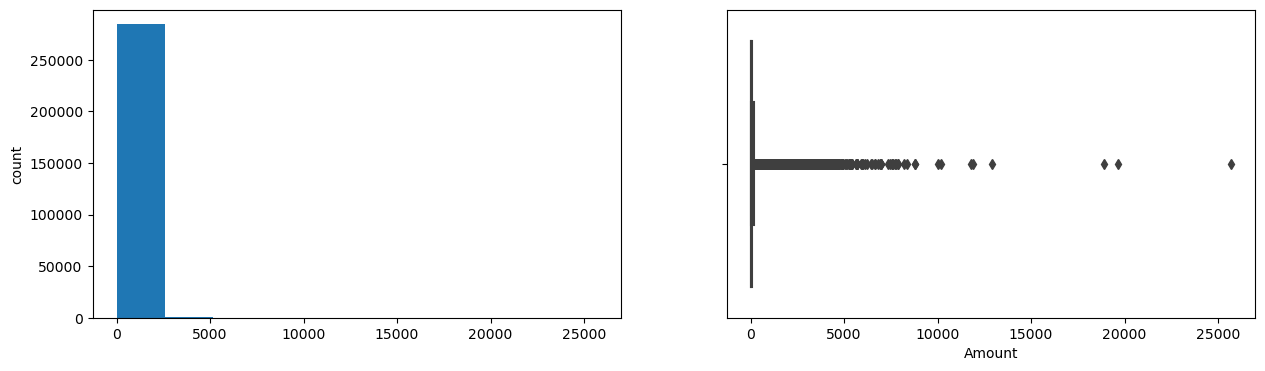

Class
Skew : 24.0


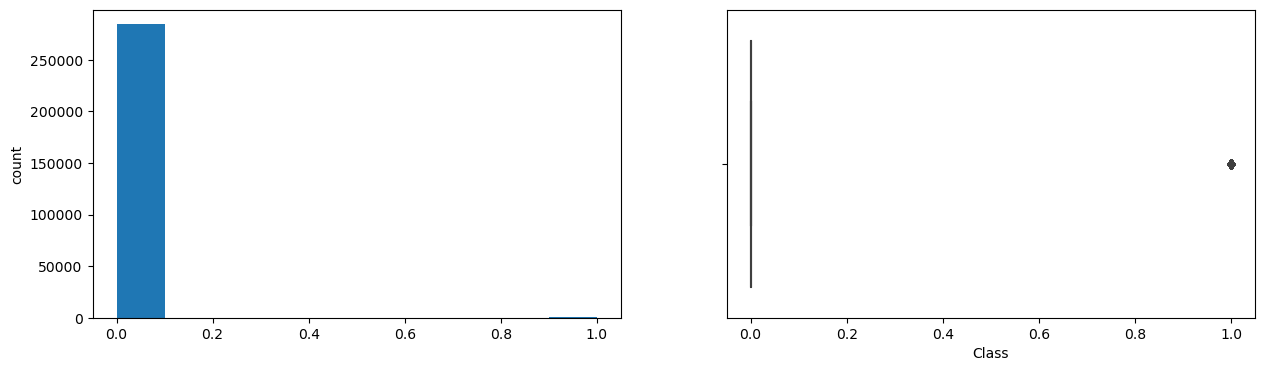

In [11]:
for col in numer:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show() 

In [12]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
df.shape

(284807, 31)

In [14]:
# Separate the features and target variable
X = df.drop(['Class'], axis=1)  
y = df['Class']

In [15]:
# Split data into train, test, and validation sets first
X_train,X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [16]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
# Resampling strategies
resampling_strategy = {
    'minority': 0.05,  # Oversample the minority class to 5% of the dataset
    'majority': 0.8    # Undersample the majority class to 80% of the dataset
}

# Pipeline with SMOTE and RandomUnderSampler
pipeline = ImbalancedPipeline([
    ('oversample', SMOTE(sampling_strategy=resampling_strategy['minority'], n_jobs=-1)),
    ('undersample', RandomUnderSampler(sampling_strategy=resampling_strategy['majority']))
])

# Fit and resample the training data
X_train_scaled, y_train = pipeline.fit_resample(X_train_scaled, y_train)                                                           

# Check the class distribution after resampling
class_distribution_after = pd.Series(y_train).value_counts(normalize=True)
print("Class distribution after resampling:", class_distribution_after)

  File "C:\Users\Katerina\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Katerina\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Katerina\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Katerina\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Class distribution after resampling: Class
0    0.555556
1    0.444444
Name: proportion, dtype: float64


In [18]:
# Create a table for results
table = PrettyTable()
table.field_names = ["Model", "ROC-AUC", "Precision-Recall AUC"]

Random Forest

In [19]:
# Fit RandomForest
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train_scaled, y_train)

# Predict probabilities on the test set for RandomForest
y_pred_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

# ROC-AUC and Precision-Recall AUC for RandomForest
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
pr_auc_rf = average_precision_score(y_test, y_pred_proba_rf)

# Classification Report for RandomForest
y_pred_rf = rf.predict(X_test_scaled)
class_report_rf = classification_report(y_test, y_pred_rf)
table.add_row(["RandomForest", f"{roc_auc_rf:.4f}", f"{pr_auc_rf:.4f}"])

Logistic Regression

In [20]:
# Fit LogisticRegression
lr = LogisticRegression(random_state=42, class_weight='balanced')
lr.fit(X_train_scaled, y_train)

# Predict probabilities on the test set for LogisticRegression
y_pred_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

# ROC-AUC and Precision-Recall AUC for LogisticRegression
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
pr_auc_lr = average_precision_score(y_test, y_pred_proba_lr)

# Classification Report for LogisticRegression
y_pred_lr = lr.predict(X_test_scaled)
class_report_lr = classification_report(y_test, y_pred_lr)
table.add_row(["LogisticRegression", f"{roc_auc_lr:.4f}", f"{pr_auc_lr:.4f}"])

XGBoost

In [21]:
# Fit XGBoost
xgb = XGBClassifier(random_state=42, scale_pos_weight=9)
xgb.fit(X_train_scaled, y_train)

# Predict probabilities on the test set for XGBoost
y_pred_proba_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

# ROC-AUC and Precision-Recall AUC for XGBoost
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
pr_auc_xgb = average_precision_score(y_test, y_pred_proba_xgb)

# Classification Report for XGBoost
y_pred_xgb = xgb.predict(X_test_scaled)
class_report_xgb = classification_report(y_test, y_pred_xgb)
table.add_row(["XGBoost", f"{roc_auc_xgb:.4f}", f"{pr_auc_xgb:.4f}"])

In [22]:
print (table)

+--------------------+---------+----------------------+
|       Model        | ROC-AUC | Precision-Recall AUC |
+--------------------+---------+----------------------+
|    RandomForest    |  0.9770 |        0.7153        |
| LogisticRegression |  0.9698 |        0.7127        |
|      XGBoost       |  0.9835 |        0.7167        |
+--------------------+---------+----------------------+


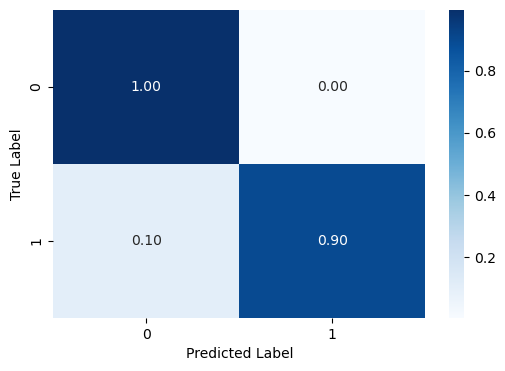

In [23]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb, normalize='true'), annot=True, fmt='.2f', cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [24]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_xgb)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_threshold_idx]

print(f"Optimal threshold (based on test set): {optimal_threshold:.4f}")

# Predict labels for the test set based on the optimal threshold
y_pred_optimal_test = (y_pred_proba_xgb >= optimal_threshold).astype(int)

Optimal threshold (based on test set): 0.9998


In [25]:
# Generate and print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_optimal_test))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.76      0.79        98

    accuracy                           1.00     56962
   macro avg       0.91      0.88      0.89     56962
weighted avg       1.00      1.00      1.00     56962



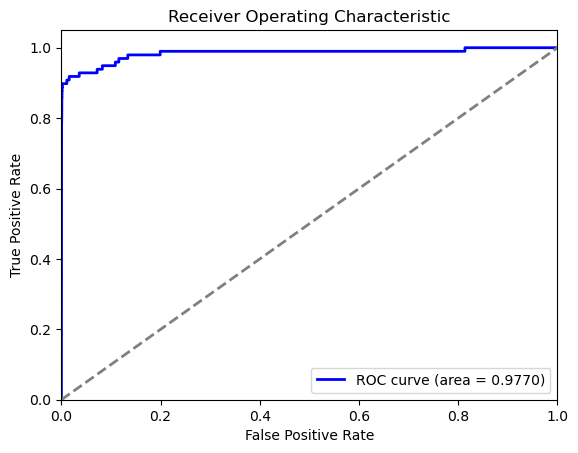

In [26]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_xgb)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

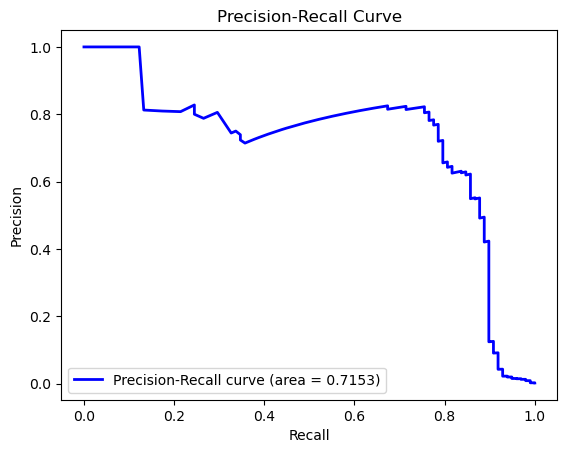

In [27]:
# Precision-Recall Curve 
precision_test, recall_test, _ = precision_recall_curve(y_test, y_pred_proba_xgb)
 
plt.figure()
plt.plot(recall_test, precision_test, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc_rf:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

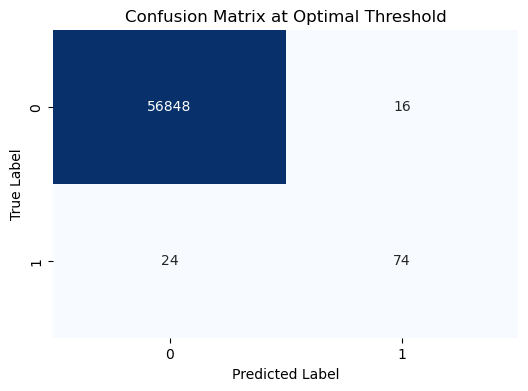

In [28]:
# Generate predictions based on the optimal threshold
y_pred_optimal_test = (y_pred_proba_xgb >= optimal_threshold).astype(int)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_optimal_test)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix at Optimal Threshold")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()